In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("Flight_Price.csv") 
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
df.shape



(10683, 11)

In [5]:
df['Total_Stop'].value_counts()


KeyError: 'Total_Stop'

In [ ]:
df.describe()


,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:

df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
df.dropna(inplace=True)


In [ ]:


# Step 2: Convert Date_of_Journey to Journey_day and Journey_month
df["Journey_day"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y").dt.day
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y").dt.month
df.drop("Date_of_Journey", axis=1, inplace=True)

# Step 3: Convert Dep_Time into hour and minute
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_minute"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df.drop("Dep_Time", axis=1, inplace=True)

# Step 4: Convert Arrival_Time into hour and minute
df["Arrival_hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
df["Arrival_minute"] = pd.to_datetime(df["Arrival_Time"]).dt.minute
df.drop("Arrival_Time", axis=1, inplace=True)

# Step 5: Convert Duration into total minutes
def convert_duration_to_minutes(x):
    x = x.strip()
    if 'h' in x and 'm' in x:
        h, m = x.split('h')
        return int(h.strip()) * 60 + int(m.replace('m', '').strip())
    elif 'h' in x:
        return int(x.replace('h', '').strip()) * 60
    elif 'm' in x:
        return int(x.replace('m', '').strip())
    return 0

df["Duration_mins"] = df["Duration"].apply(convert_duration_to_minutes)
df.drop("Duration", axis=1, inplace=True)

# Step 6: Label Encode Total_Stops
le = LabelEncoder()
df["Total_Stops"] = le.fit_transform(df["Total_Stops"])

# Step 7: Drop Route column (too many unique text paths) or optionally encode it
df.drop("Route", axis=1, inplace=True)

# Step 8: One-hot encode categorical columns
df = pd.get_dummies(df, columns=["Airline", "Source", "Destination", "Additional_Info"], drop_first=True)

# Final check
print(df.shape)
print(df.head())


(10682, 38)
   Total_Stops  Price  Journey_day  Journey_month  Dep_hour  Dep_minute  \
0            4   3897           24              3        22          20   
1            1   7662            1              5         5          50   
2            1  13882            9              6         9          25   
3            0   6218           12              5        18           5   
4            0  13302            1              3        16          50   

   Arrival_hour  Arrival_minute  Duration_mins  Airline_Air India  ...  \
0             1              10            170                  0  ...   
1            13              15            445                  1  ...   
2             4              25           1140                  0  ...   
3            23              30            325                  0  ...   
4            21              35            285                  0  ...   

   Destination_New Delhi  Additional_Info_1 Short layover  \
0                      1       

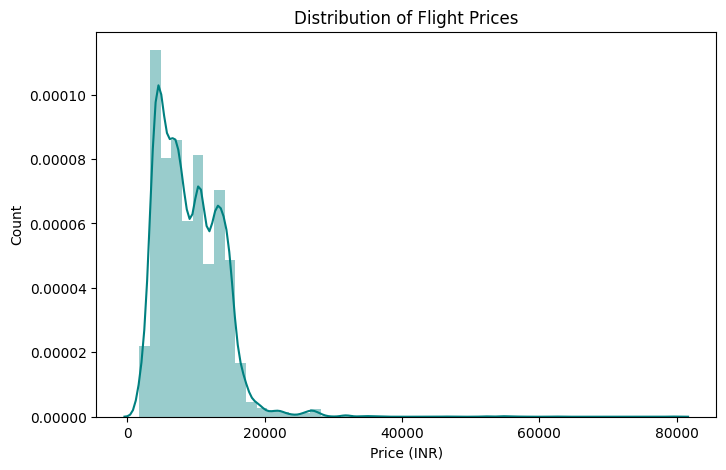

In [ ]:
#1. Price Distribution


plt.figure(figsize=(8, 5))
sns.distplot(df['Price'], bins=50, kde=True, color='teal')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price (INR)')
plt.ylabel('Count')
plt.show()


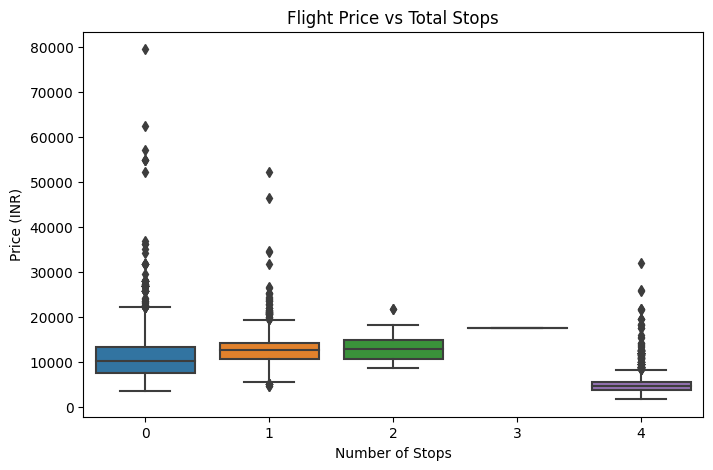

In [ ]:
#Price vs Total Stops
plt.figure(figsize=(8, 5))
sns.boxplot(x='Total_Stops', y='Price', data=df)
plt.title('Flight Price vs Total Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Price (INR)')
plt.show()


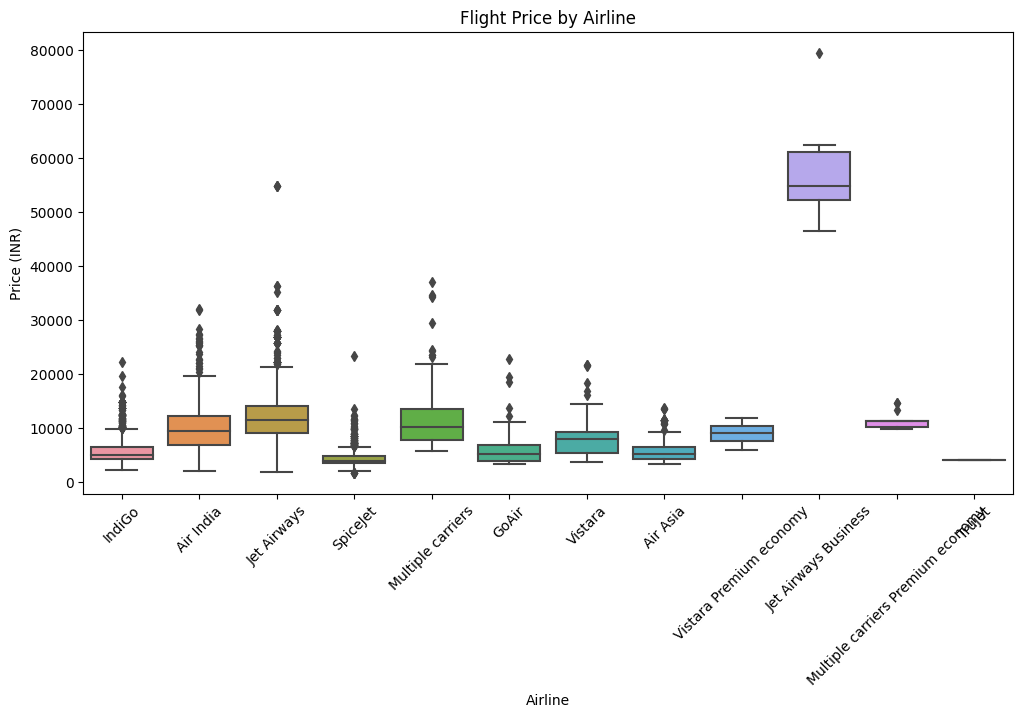

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
original_df = pd.read_csv('Flight_Price.csv')

# Now plot Price vs Airline using the DataFrame
plt.figure(figsize=(12, 6))
sns.boxplot(x='Airline', y='Price', data=original_df)
plt.xticks(rotation=45)
plt.title('Flight Price by Airline')
plt.ylabel('Price (INR)')
plt.show()


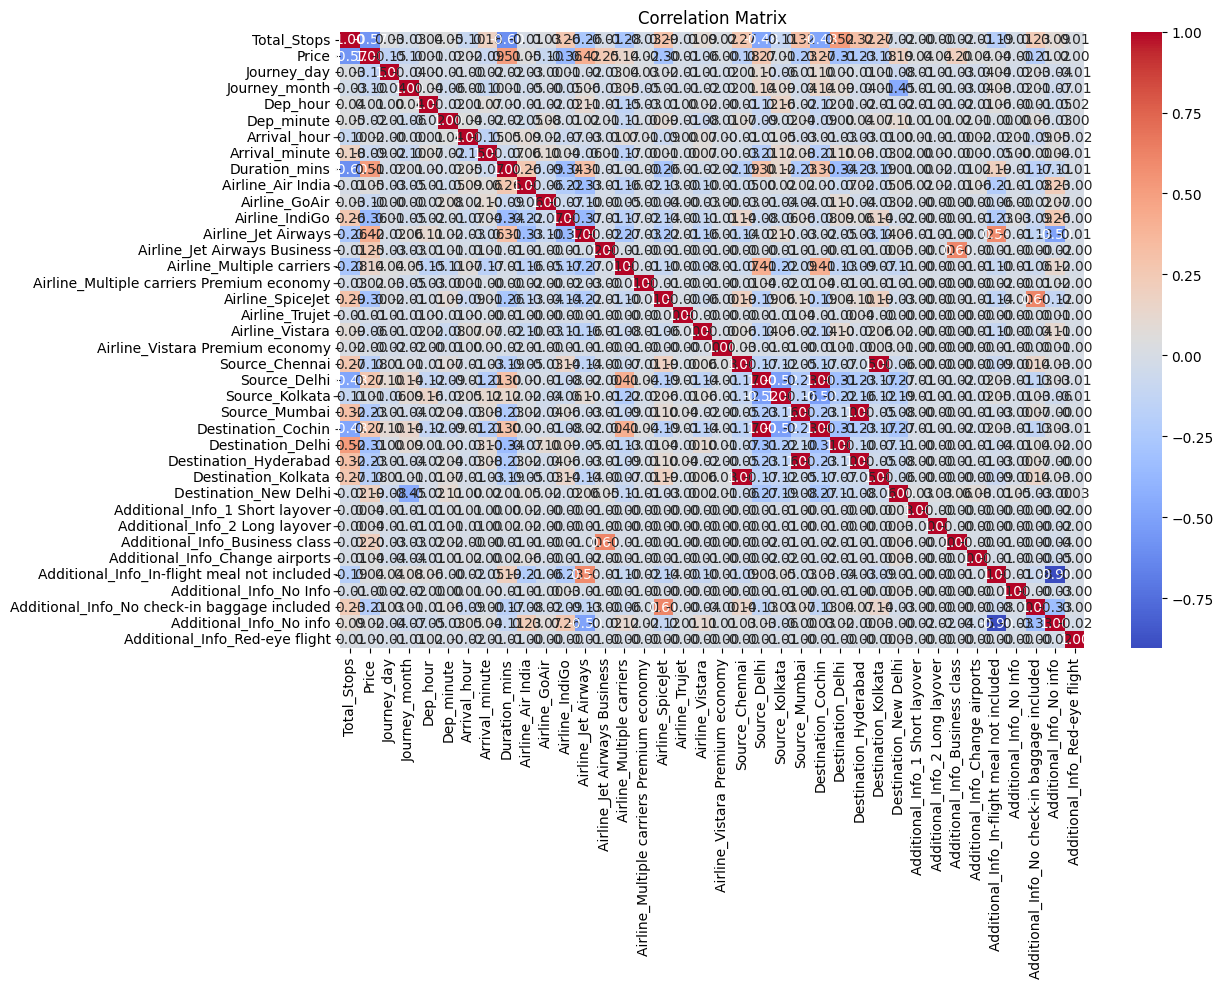

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Features and target
X = df.drop(['Price'], axis=1)
y = df['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling (for Linear Regression only)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print("Linear Regression")
print("RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False))
print("R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression
RMSE: 2641.703155227604
R2 Score: 0.6763483289615807


In [ ]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost")
print("RMSE:", mean_squared_error(y_test, y_pred_xgb, squared=False))
print("R2 Score:", r2_score(y_test, y_pred_xgb))


XGBoost
RMSE: 1573.6015550382435
R2 Score: 0.8851583625980979


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest")
print("RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest
RMSE: 1466.0410951050171
R2 Score: 0.9003213580270494


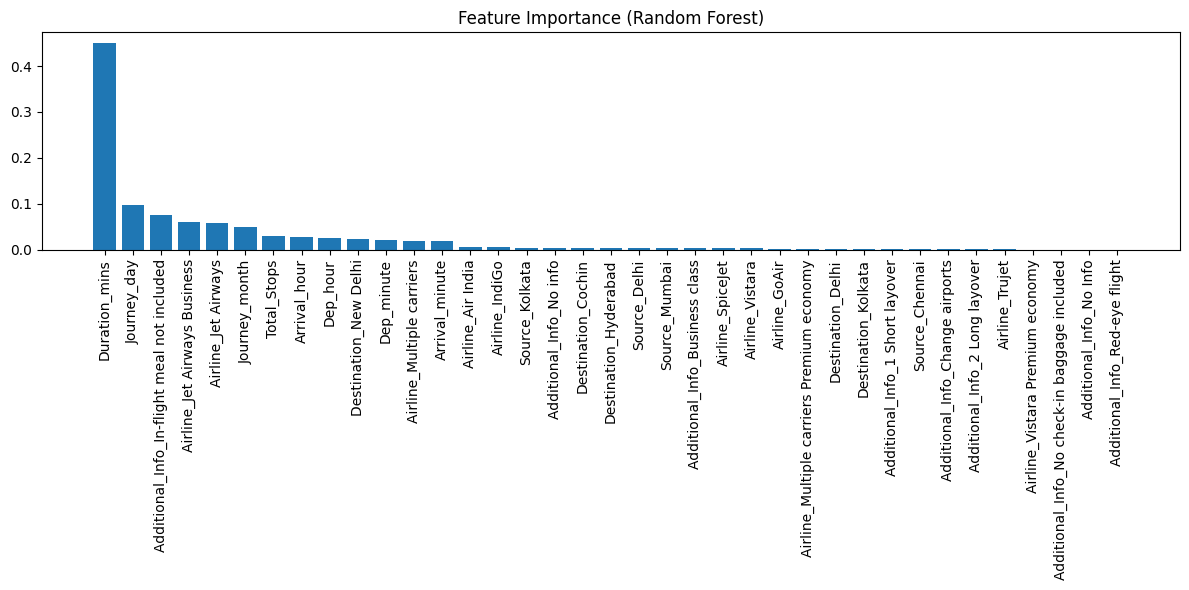

In [ ]:
import matplotlib.pyplot as plt
importances = rf.feature_importances_
features = X.columns
sorted_idx = importances.argsort()[::-1]

plt.figure(figsize=(12, 6))
plt.bar(range(len(importances)), importances[sorted_idx], align='center')
plt.xticks(range(len(importances)), features[sorted_idx], rotation=90)
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()


In [ ]:
import pickle
import os

# Save Random Forest model
with open("final_model.pkl", "wb") as f:
    pickle.dump(rf, f)

# Save scaler (used for Linear Regression only)
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Save LabelEncoder (for Total_Stops)
with open("label_encoder_total_stops.pkl", "wb") as f:
    pickle.dump(le, f)

print("✅ Pickle files saved successfully.")


✅ Pickle files saved successfully.


In [ ]:
import mlflow
import os

# Define a local path where MLflow can safely write
mlflow_tracking_dir = os.path.abspath("mlruns")  # or give a full valid path

# Make sure the directory exists
os.makedirs(mlflow_tracking_dir, exist_ok=True)

# Set the MLflow tracking URI to local folder
mlflow.set_tracking_uri(f"file://{mlflow_tracking_dir}")


In [ ]:
if mlflow.active_run():
    mlflow.end_run()

with mlflow.start_run(run_name="RandomForest_Local"):
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("random_state", 42)

    rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
    r2_rf = r2_score(y_test, y_pred_rf)

    mlflow.log_metric("rmse", rmse_rf)
    mlflow.log_metric("r2_score", r2_rf)

    mlflow.sklearn.log_model(rf, artifact_path="rf_model")

    print(f"✅ Model logged. RMSE: {rmse_rf:.2f}, R²: {r2_rf:.2f}")


2025/06/21 16:22:26 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



✅ Model logged. RMSE: 1466.04, R²: 0.90


In [ ]:
import pickle

with open("features.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)


In [ ]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64